# UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

## Metode KNN
1. Ambil Data terlebih dahulu


In [11]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/MeAdila/dataset/main/dataR2.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


2. lakukan drop pada kolom untuk kelas pada data

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["Classification"])
#check that the target variable has been removed
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


ambil 5 nilai sebgai target

In [ ]:
#separate target values
y = df["Classification"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

3. tentukan parameter K

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([1, 2, 1, 2, 2])

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.3333333333333333

4. urutkan seluruh jarak

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.5        0.52173913 0.47826087 0.47826087 0.60869565]
cv_scores mean:0.5173913043478261


Sesuaikan klasifikasi dari kategori Y

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

5. Gunakan kelas dengan jumlah terbanyak

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 23}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5688405797101449

## Metode Pohon Keputusan (Desision Tree)

ambil data

In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("https://raw.githubusercontent.com/MeAdila/dataset/main/dataR2.csv")

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


lakukan tampilan facetgrid untuk menampilkan kelas

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


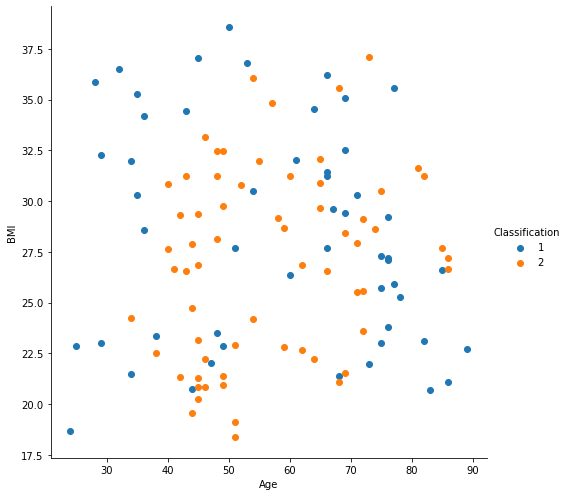

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df, hue="Classification",size =7).map(plt.scatter, "Age", "BMI").add_legend()

ambil 4 kolom

In [33]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

x

,Age,BMI,Glucose,Insulin
0,48,23.500000,70,2.707
1,83,20.690495,92,3.115
2,82,23.124670,91,4.498
3,68,21.367521,77,3.226
4,86,21.111111,92,3.549
...,...,...,...,...
111,45,26.850000,92,3.330
112,62,26.840000,100,4.530
113,65,32.050000,97,5.730
114,72,25.590000,82,2.820


In [34]:
y

0      0.467409
1      0.706897
2      1.009651
3      0.612725
4      0.805386
         ...   
111    0.755688
112    1.117400
113    1.370998
114    0.570392
115    6.777364
Name: HOMA, Length: 116, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state=10)

x_train

,Age,BMI,Glucose,Insulin
87,85,27.688778,196,51.814
112,62,26.840000,100,4.530
67,64,22.222222,98,5.700
61,69,21.513859,112,6.683
82,48,32.461911,99,28.677
...,...,...,...,...
28,35,35.250761,90,6.817
64,59,22.832879,98,6.862
15,44,20.760000,86,7.553
100,74,28.650138,88,3.012


lakukan pengukuran untuk tampilan kelas yang akan dijadikan desision tree

In [36]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x, y)

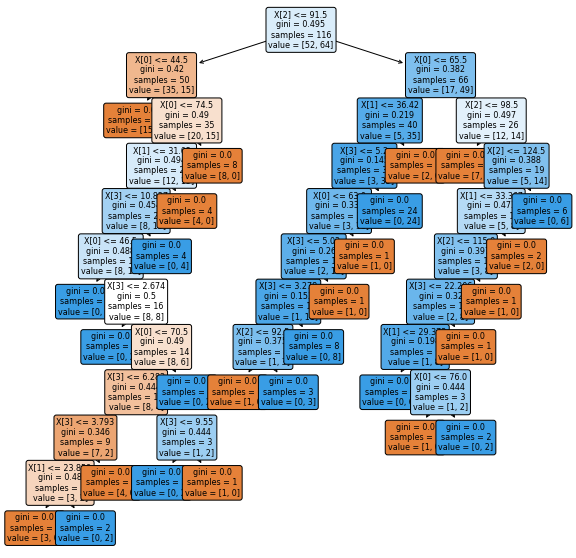

In [37]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()